In [1]:
pip install pandas seaborn matplotlib wordcloud scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df=pd.read_csv("../data/sentiment_data.csv")
df=df[['target','text']]
df['target']=df['target'].replace(4,1)
print(df.shape)


(1599999, 2)


In [6]:
print(df['target'].value_counts())


1    800000
0    799999
Name: target, dtype: int64


In [7]:
import re

In [8]:
def clean_text(text):
    text=re.sub(r'@\w+','',text)
    text=re.sub(r'#\w+','',text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()
df['clean_text']=df['text'].apply(clean_text)
df[['text','clean_text']].head()

,text,clean_text
0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
2,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
4,@Kwesidei not the whole crew,not the whole crew


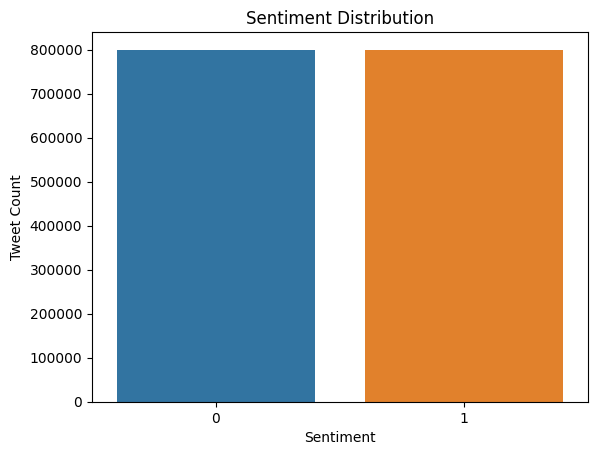

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target',data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

In [10]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from wordcloud import WordCloud

pos_text= "".join(df[df['target']==1]['clean_text'])
neg_text= "".join(df[df['target']==0]['clean_text'])

Text(0.5, 1.0, 'Positive Tweet WordCloud')

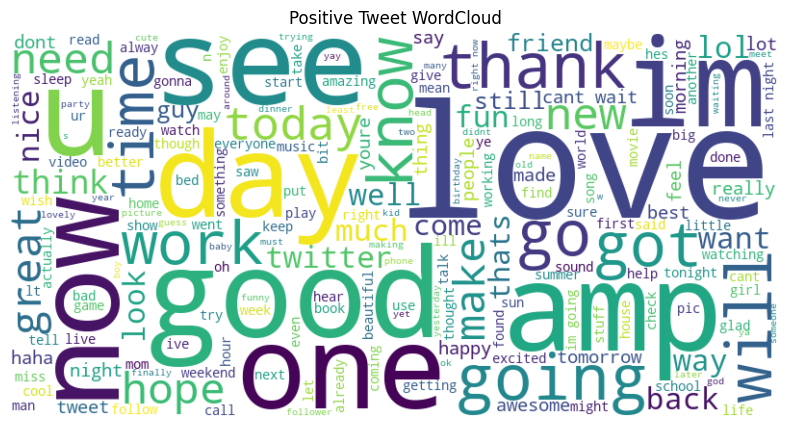

In [12]:
wc_pos=WordCloud(width=800,height=400,background_color='white').generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_pos,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweet WordCloud')
plt.show()

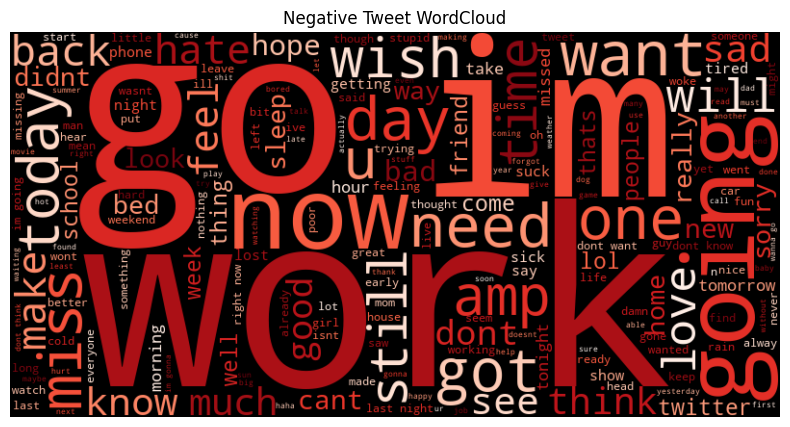

In [13]:
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweet WordCloud")
plt.show()

In [15]:
df_sample = df.sample(1000, random_state=42)
df_sample.to_csv('../data/train_sample.csv', index=False)


### ML MODEL

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv("../data/train_sample.csv")

In [14]:
df = df.dropna(subset=['clean_text'])




In [15]:
x=df['clean_text']
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(stop_words='english',max_features=5000)

x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

model=LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf,y_train)

y_pred=model.predict(x_test_tfidf)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.625
Confusion Matrix:
 [[59 40]
 [35 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61        99
           1       0.62      0.65      0.64       101

    accuracy                           0.62       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.63      0.62      0.62       200



In [22]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import joblib

# Save model and vectorizer
joblib.dump(model, '../model/logistic_model.pkl')
joblib.dump(vectorizer, '../model/tfidf_vectorizer.pkl')


['../model/tfidf_vectorizer.pkl']